In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [10]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx @ w # N - (N,2 x 2,1)
    return (e.T @ e) / (2*len(y))

In [11]:
w = np.array((1,2))
compute_loss(y,tx,w)

np.float64(2694.483365887084)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [16]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    l1,l2 = len(grid_w0),len(grid_w1)

    for i in range(l1):
        for j in range(l2):
            tmp = np.array([grid_w0[i],grid_w1[j]])
            losses[i,j] = compute_loss(y,tx,tmp)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678199, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


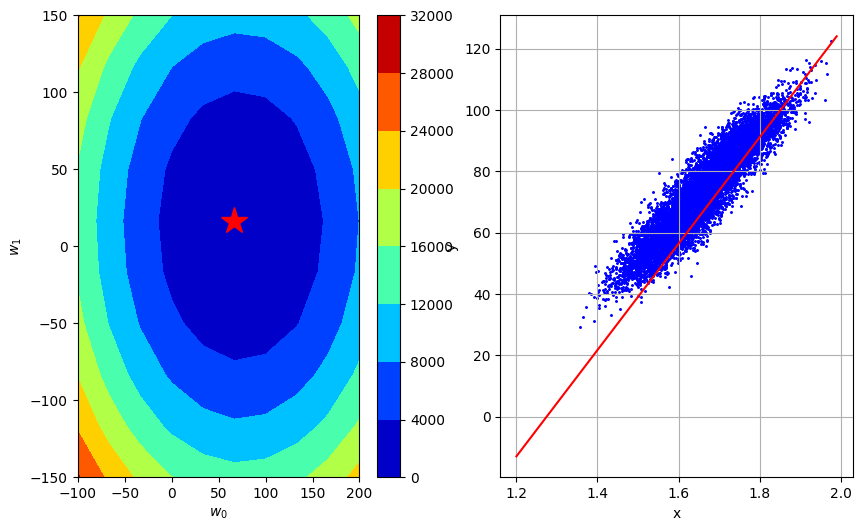

In [23]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [25]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e = y - tx @ w
    return -1/len(y)*tx.T @ e

Please fill in the functions `gradient_descent` below:

In [37]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        grad = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*grad

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [52]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759168, w0=146.58784400421058, w1=26.9594248699785
GD iter. 1/49: loss=2792.2367127591965, w0=1.4210854715202004e-13, w1=-8.952838470577262e-13
GD iter. 2/49: loss=2792.2367127591697, w0=146.58784400421052, w1=26.9594248699794
GD iter. 3/49: loss=2792.2367127592042, w0=1.1368683772161603e-13, w1=-1.694644424787839e-12
GD iter. 4/49: loss=2792.236712759181, w0=146.58784400421047, w1=26.959424869980257
GD iter. 5/49: loss=2792.2367127592115, w0=1.1368683772161603e-13, w1=-2.632560835991171e-12
GD iter. 6/49: loss=2792.2367127591947, w0=146.58784400421047, w1=26.959424869981323
GD iter. 7/49: loss=2792.2367127592265, w0=0.0, w1=-3.7907454952801345e-12
GD iter. 8/49: loss=2792.2367127592183, w0=146.58784400421052, w1=26.959424869982396
GD iter. 9/49: loss=2792.2367127592443, w0=1.7053025658242404e-13, w1=-5.019984428145108e-12
GD iter. 10/49: loss=2792.236712759222, w0=146.5878440042104, w1=26.959424869983582
GD iter. 11/49: loss=2792.2367127592524, w0=3.4106

In [53]:
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt

def plot_figure(n_iter):
    plt.figure(figsize=(14, 10))
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    plt.show()   # ensure it actually updates in the notebook

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)-1, step=1))



interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

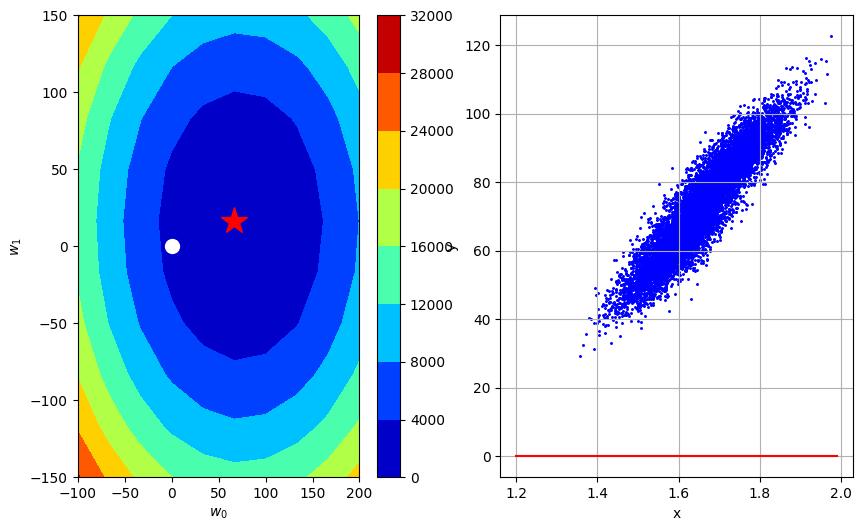

In [51]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [56]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    e = y - tx @ w
    return tx.T @ e * -1/(len(y))


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        for y_b,tx_b in batch_iter(y,tx,batch_size,num_batches=1,shuffle=True):
            loss = compute_loss(y_b,tx_b,w)
            grad = compute_stoch_gradient(y_b,tx_b,w)
        
            w = w - gamma * grad

        loss = compute_loss(y,tx,w)
        losses.append(loss)
        ws.append(w)
 
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [57]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2240.709027959081, w0=8.02435510158637, w1=-0.3235450355938763
SGD iter. 1/49: loss=1665.2023008326064, w0=16.074256438874983, w1=8.42573392695725
SGD iter. 2/49: loss=1402.8460115290213, w0=21.095893854317623, w1=6.3884428164254
SGD iter. 3/49: loss=1157.4911488083699, w0=26.828189477362752, w1=2.2928351755311533
SGD iter. 4/49: loss=1002.5109526057474, w0=30.590634626746326, w1=1.2045596126672975
SGD iter. 5/49: loss=918.0711528070782, w0=34.10117662394213, w1=-2.930626976460547
SGD iter. 6/49: loss=876.8005364362631, w0=36.69047427478085, w1=-6.0911054224205134
SGD iter. 7/49: loss=707.2987222203795, w0=40.948381835215635, w1=-4.893956224678088
SGD iter. 8/49: loss=455.4727342626041, w0=46.20898825171078, w1=1.3726873452200374
SGD iter. 9/49: loss=420.5281596511559, w0=48.291685673246334, w1=-0.1281059838664833
SGD iter. 10/49: loss=419.9359636077143, w0=48.39182613458584, w1=-0.26749720488500806
SGD iter. 11/49: loss=391.11940519791153, w0=49.85689131675187, w1

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

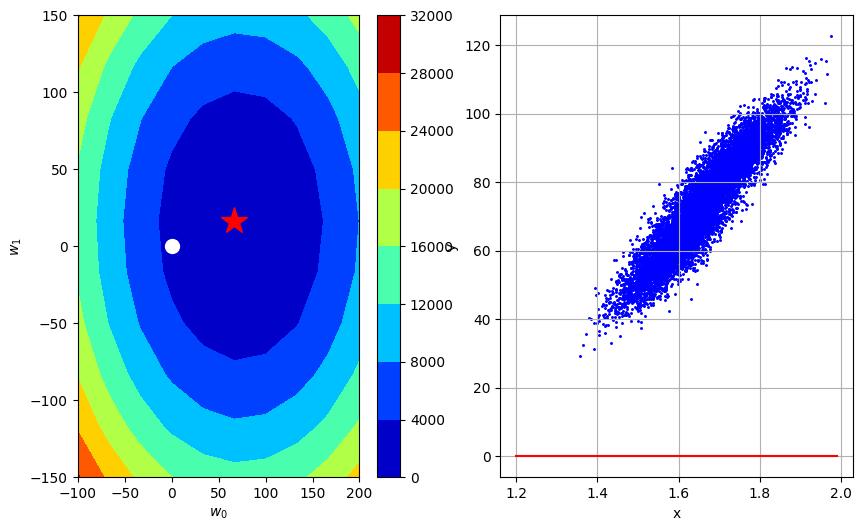

In [58]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

In [59]:
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt

def plot_figure(n_iter):
    if n_iter < 1:
        n_iter = 1  # avoid empty slice
    
    plt.figure(figsize=(10, 6))
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)-1, step=1))


interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [62]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height,weight,_ = load_data(sub_sample=True,add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [63]:
y.shape, tx.shape

((202,), (202, 2))

In [73]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
sgd_losses, sgd_ws = gradient_descent(y,tx,w_initial,max_iters,gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844847, w1=7.724426406192433
GD iter. 1/49: loss=318.2821247015953, w0=67.401703327983, w1=10.041754328050116
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=66.11469426926602, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248088, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003891
GD iter. 11/49: loss=65.93073011140234, w0=74.06776649225755, w1=11.034889001593537
GD iter. 

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

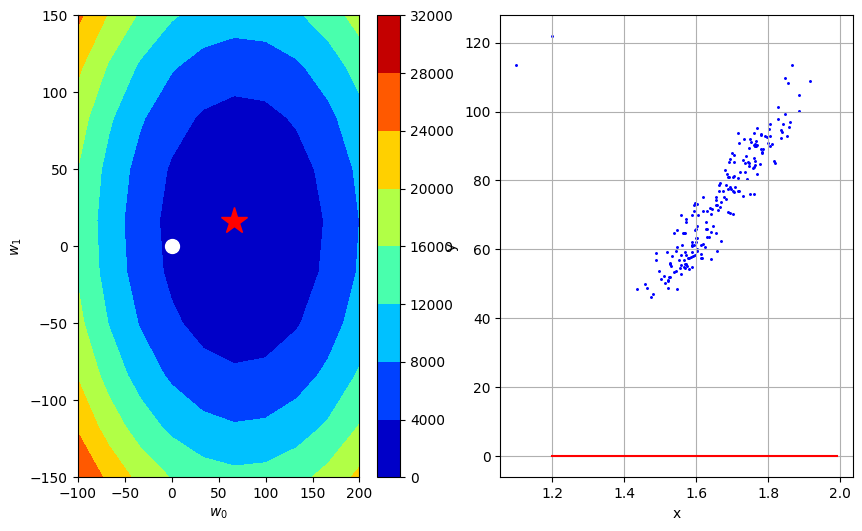

In [74]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

In [75]:
# Compute grid losses for visualization
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# --- Visualization without outliers ---
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt

def plot_figure(n_iter):
    plt.figure(figsize=(10, 6))
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)-1, step=1))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [77]:
def compute_mae_loss(y,tx,w):
    return np.mean(np.abs(y-tx@w))

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    e = y -tx@w
    subgrad = -(tx.T @ np.sign(e))/len(y)
    return subgrad

In [78]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        loss = compute_mae_loss(y,tx,w)
        grad = compute_subgradient_mae(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma*grad

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [79]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=7.325273501091131e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.4650547002182263e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=2.1975820503273395e-15
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=2.9301094004364526e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.662636750545566e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=4.395164100654679e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=5.1276914507637925e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=5.860218800872906e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=6.5927461509820194e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=7.325273501091133e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=8.057800851200246e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=8.79032820130936e-15
SubGD iter

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

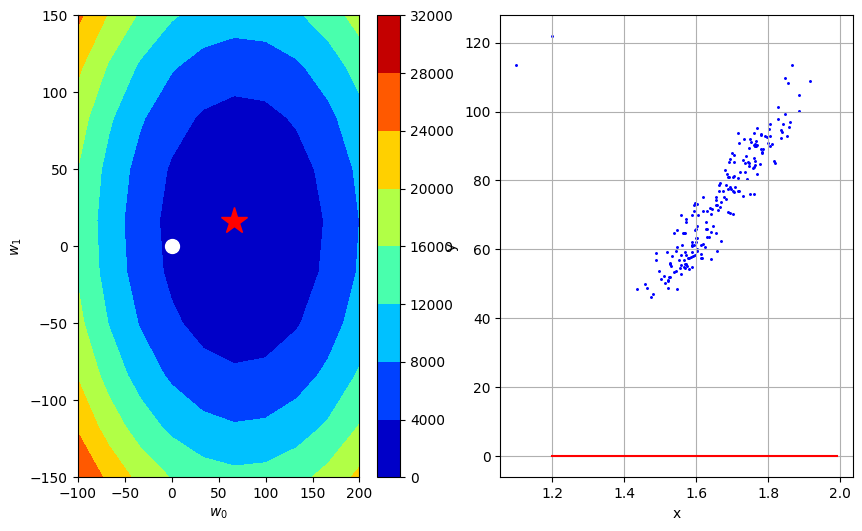

In [85]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

In [86]:
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt

def plot_figure(n_iter):
    if n_iter < 1:
        n_iter = 1  # avoid empty slice
    
    plt.figure(figsize=(10, 6))
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)-1, step=1))


interactive(children=(IntSlider(value=1, description='n_iter', max=500, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [91]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for y_b, tx_b in batch_iter(y,tx,batch_size,num_batches=1,shuffle=True):

            loss = compute_mae_loss(y_b,tx_b,w)
            grad = compute_subgradient_mae(y_b,tx_b,w)

            w = w - gamma*grad

            losses.append(loss)
            ws.append(w)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [92]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=121.80616740088105, w0=0.7, w1=-2.7702996968889892
SubSGD iter. 1/499: loss=46.77217939681719, w0=1.4, w1=-3.611718206614934
SubSGD iter. 2/499: loss=77.38930564881838, w0=2.0999999999999996, w1=-3.063323702857123
SubSGD iter. 3/499: loss=50.382630677258184, w0=2.8, w1=-4.100837896670663
SubSGD iter. 4/499: loss=81.76853662651398, w0=3.5, w1=-3.722298113313932
SubSGD iter. 5/499: loss=95.83998105307853, w0=4.2, w1=-2.8660760608093936
SubSGD iter. 6/499: loss=44.507575818552304, w0=4.9, w1=-3.7677083252221513
SubSGD iter. 7/499: loss=88.4781333797027, w0=5.6000000000000005, w1=-3.1354338967404605
SubSGD iter. 8/499: loss=59.665543060483564, w0=6.300000000000001, w1=-3.488549648307775
SubSGD iter. 9/499: loss=54.128081762750746, w0=7.000000000000001, w1=-3.732576473016926
SubSGD iter. 10/499: loss=47.00466085443277, w0=7.700000000000001, w1=-4.302536597552912
SubSGD iter. 11/499: loss=66.44046532368498, w0=8.4, w1=-4.250376252023202
SubSGD iter. 12/499: loss=34.2

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

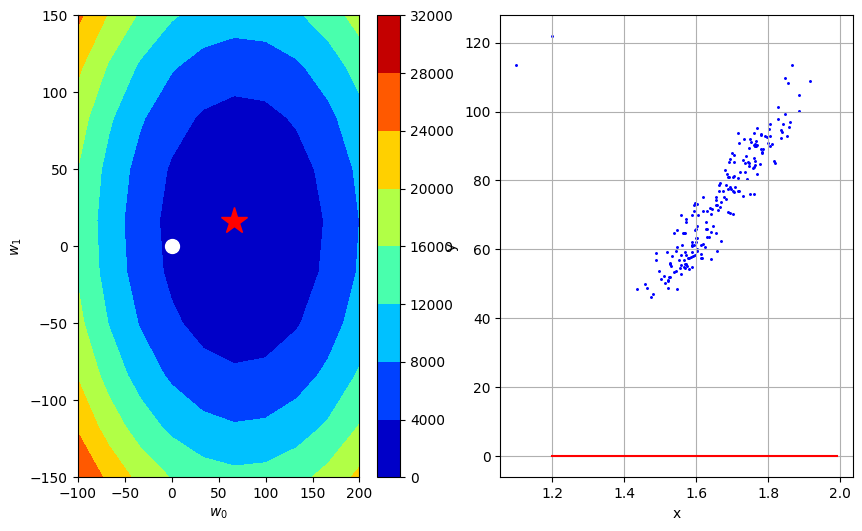

In [93]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

In [94]:
from ipywidgets import IntSlider, interact
import matplotlib.pyplot as plt

def plot_figure(n_iter):
    if n_iter < 1:
        n_iter = 1  # avoid empty slice
    
    plt.figure(figsize=(10, 6))
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)-1, step=1))


interactive(children=(IntSlider(value=1, description='n_iter', max=500, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>